## 1. Where did the dataset come from?

In [1]:
print("The source is :", 'http://www.nhc.noaa.gov/data/tcr/index.php?season=2016&basin=atl')
print("Hurricane Alex files.")


The source is : http://www.nhc.noaa.gov/data/tcr/index.php?season=2016&basin=atl
Hurricane Alex files.


## 2. If I had questions about this dataset, who would I ask?

In [2]:
# http://www.nhc.noaa.gov/data/tcr/index.php?season=2016&basin=atl
# http://www.emc.ncep.noaa.gov/mtt/docs/NOAA%20Training%20Slides%20(Group%20B)-NCEP(17-Apr-12)-DRAFTR2.pptx

# US Dept of Commerce
# National Oceanic and Atmospheric Administration
# National Hurricane Center
# 11691 SW 17th Street
# Miami, FL, 33165
# nhcwebmaster@noaa.gov

## 3. Open the dataset using pandas.

In [3]:
import pandas as pd
df = pd.read_csv("al012016_pts.csv", error_bad_lines=False)
df.head()


,X,Y,STORMNAME,DTG,YEAR,MONTH,DAY,HHMM,TAU,MSLP,BASIN,STORMNUM,STORMTYPE,INTENSITY,SS,LAT,LON
0,-75.300003,26.600000,TEST,2016010700,2016,JAN,7,0,0,1010,AL,1,Extratropical Cyclone,40,0,26.6,-75.3
1,-74.699997,27.600000,TEST,2016010706,2016,JAN,7,600,0,1003,AL,1,Extratropical Cyclone,45,0,27.6,-74.7
2,-73.800003,28.700001,TEST,2016010712,2016,JAN,7,1200,0,997,AL,1,Extratropical Cyclone,50,0,28.7,-73.8
3,-72.500000,30.000000,TEST,2016010718,2016,JAN,7,1800,0,987,AL,1,Extratropical Cyclone,55,0,30.0,-72.5
4,-70.599998,31.400000,TEST,2016010800,2016,JAN,8,0,0,986,AL,1,Extratropical Cyclone,55,0,31.4,-70.6


## 4. How many columns and rows does it have?

In [4]:
print("It has", df.shape[0], "rows")
print("and has", df.shape[1], "columns")


It has 42 rows
and has 17 columns


## 5. What are the data types of each column?

In [5]:
df.dtypes


X            float64
Y            float64
STORMNAME     object
DTG            int64
YEAR           int64
MONTH         object
DAY            int64
HHMM           int64
TAU            int64
MSLP           int64
BASIN         object
STORMNUM       int64
STORMTYPE     object
INTENSITY      int64
SS             int64
LAT          float64
LON          float64
dtype: object

## 6. Tell me what four of the columns mean, and state whether you made up the definitions or used a data dictionary.


In [6]:
# I used a data dictionary:

# X          : Longitude
# Y          : Latitude
# MSLP       : Mean Sea Level Pressure
# TAU        : Tuning and Analysis Utilities
# HHMM       : Hour Hour Minute Minute 


# I made these up:

# STORMNAME  : name of the hurricane
# DTG        : date and time
# YEAR       
# MONTH      
# DAY        
# BASIN      
# STORMNUM   : number of storms in the year
# STORMTYPE     
# INTENSITY
# SS         
# LAT        : rounded value of Y
# LON        : rounded value of X

## 7. Write five questions you could ask the data. A simple way to ask decent questions is comparing a measurement across two subgroups. For example, "how do points scored in basketball in the 1950's compare to the 1990's," "how often do women punch walls vs. men punch walls?"

In [7]:
# 7-1. Compare the average intensity by STORMNAME
# 7-2. Compare the average mean sea level pressure by STORMNAME
# 7-3. Find the number of rows for each STORMTYPE
# 7-4. Graph the intensity by DTG
# 7-5. Find the time of day (out of midnight, 6 a.m., noon, 6 p.m.) for which the MSLP/INTENSITY is highest.


## 8. Try to ask the data those five questions

In [8]:
# 7-1. Compare the average intensity by STORMNAME
df.groupby('STORMNAME')['INTENSITY'].mean()


STORMNAME
ALEX      61.428571
INVEST    47.500000
TEST      53.181818
Name: INTENSITY, dtype: float64

In [9]:
# 7-2. Compare the average mean sea level pressure by STORMNAME
df.groupby('STORMNAME')['MSLP'].mean()


STORMNAME
ALEX      983.285714
INVEST    988.666667
TEST      987.409091
Name: MSLP, dtype: float64

In [10]:
# 7-3. Find the number of rows for each STORMTYPE
df['STORMTYPE'].value_counts()


Extratropical Cyclone    29
Subtropical Storm         6
Hurricane1                5
Tropical Storm            2
Name: STORMTYPE, dtype: int64

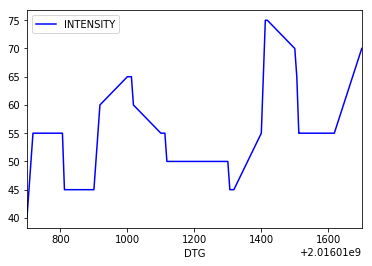

In [11]:
%matplotlib inline
# 7-4. Graph the intensity by DTG
ax = df.plot(x='DTG', y='INTENSITY', c='blue')

In [12]:
# 7-5. Find the time of day (out of midnight, 6 a.m., noon, 6 p.m.) for which the MSLP/INTENSITY is highest.
print(df.groupby('HHMM')['MSLP'].mean().sort_values(ascending=False).head(1)  )
print(df.groupby('HHMM')['INTENSITY'].mean().sort_values(ascending=False).head(1)  )

HHMM
600    987.1
Name: MSLP, dtype: float64
HHMM
0    55.454545
Name: INTENSITY, dtype: float64


## 9. If you have problems reading the data in or asking the questions, keep a lot of notes about that. I hope you all run into a hundred problems, then we can solve them next week.